In [1]:
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
from skimage import feature
from skimage import filters
import numpy as np
import imageio
%matplotlib inline
plt.rcParams.update({'image.interpolation': None})
plt.rcParams.update({'font.size': 15})

Text(0.5, 1.0, 'The histogram of the blue channel of the image')

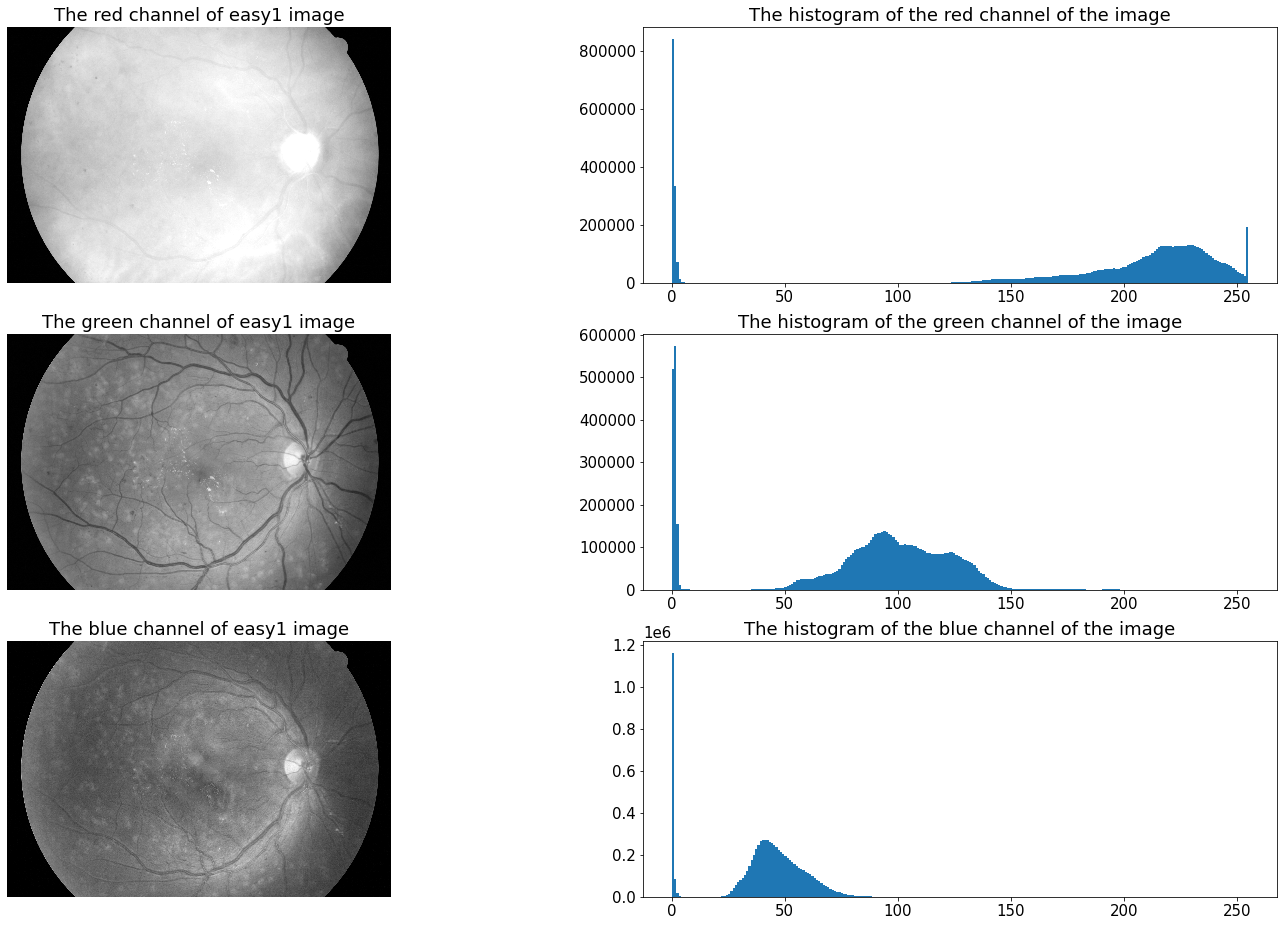

In [66]:
I_easy = np.asarray(imageio.imread('easy1.jpg'))
Ir_easy = I[:,:,0]
Ig_easy = I[:,:,1]
Ib_easy = I[:,:,2]

plt.figure(figsize=(25,16))

plt.subplot(3,2,1)
plt.imshow(Ir_easy,cmap="gray")
plt.axis('off')
plt.title('The red channel of easy1 image')

plt.subplot(3,2,2)
plt.hist(Ir_easy.flatten(),bins=256,range=[0,255])
plt.title('The histogram of the red channel of the image')

plt.subplot(3,2,3)
plt.imshow(Ig_easy,cmap="gray")
plt.axis('off')
plt.title('The green channel of easy1 image')

plt.subplot(3,2,4)
plt.hist(Ig_easy.flatten(),bins=256,range=[0,255])
plt.title('The histogram of the green channel of the image')

plt.subplot(3,2,5)
plt.imshow(Ib_easy,cmap="gray")
plt.axis('off')
plt.title('The blue channel of easy1 image')

plt.subplot(3,2,6)
plt.hist(Ib_easy.flatten(),bins=256,range=[0,255])
plt.title('The histogram of the blue channel of the image')

Text(0.5, 1.0, 'The histogram of the blue channel of the image')

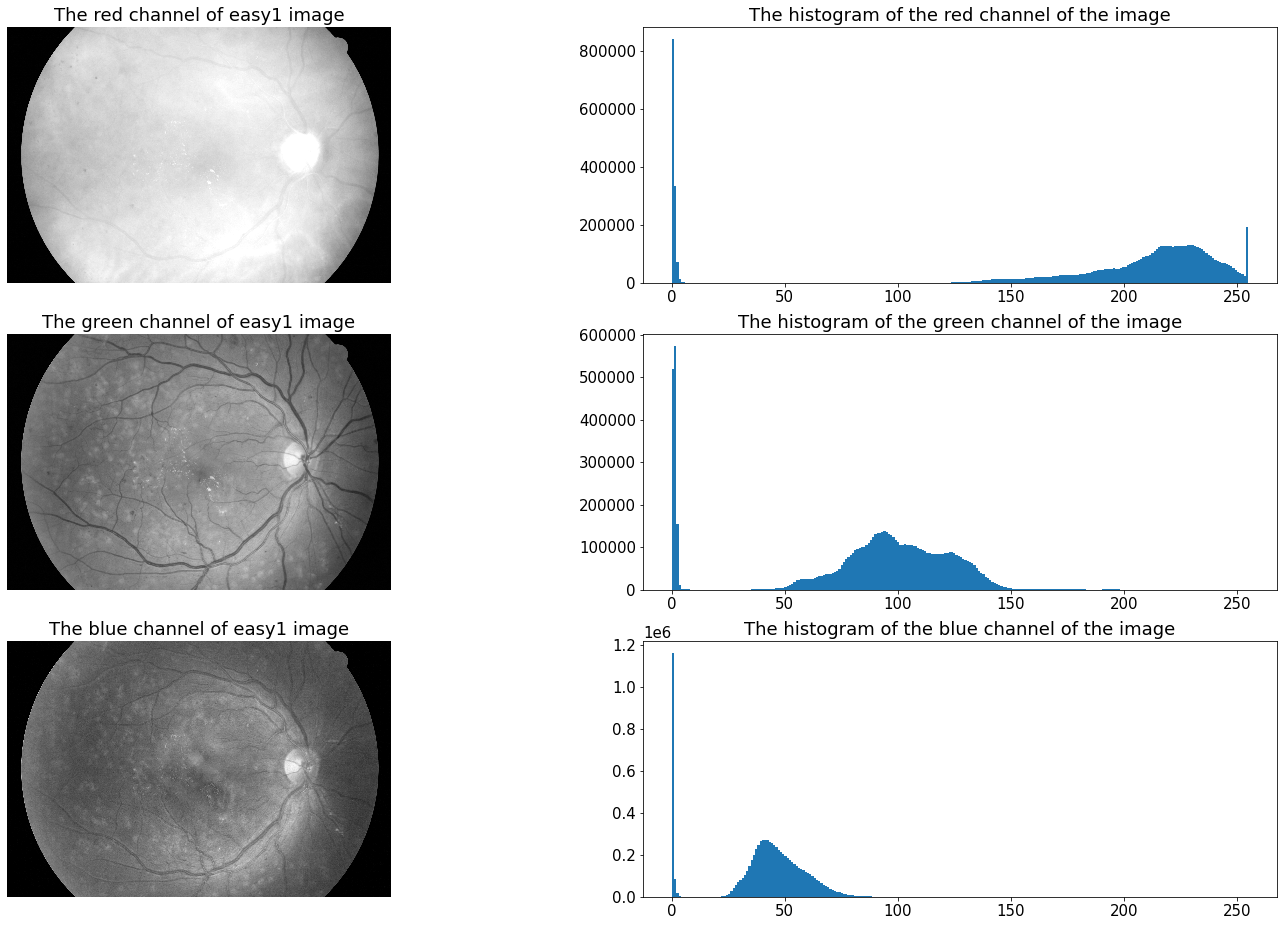

In [7]:
I_medium = np.asarray(imageio.imread('medium1.jpg'))
Ir_medium = I[:,:,0]
Ig_medium = I[:,:,1]
Ib_medium = I[:,:,2]

plt.figure(figsize=(25,16))

plt.subplot(3,2,1)
plt.imshow(Ir_medium,cmap="gray")
plt.axis('off')
plt.title('The red channel of easy1 image')

plt.subplot(3,2,2)
plt.hist(Ir_medium.flatten(),bins=256,range=[0,255])
plt.title('The histogram of the red channel of the image')

plt.subplot(3,2,3)
plt.imshow(Ig_medium,cmap="gray")
plt.axis('off')
plt.title('The green channel of easy1 image')

plt.subplot(3,2,4)
plt.hist(Ig_medium.flatten(),bins=256,range=[0,255])
plt.title('The histogram of the green channel of the image')

plt.subplot(3,2,5)
plt.imshow(Ib_medium,cmap="gray")
plt.axis('off')
plt.title('The blue channel of easy1 image')

plt.subplot(3,2,6)
plt.hist(Ib_medium.flatten(),bins=256,range=[0,255])
plt.title('The histogram of the blue channel of the image')

Text(0.5, 1.0, 'The histogram of the blue channel of the image')

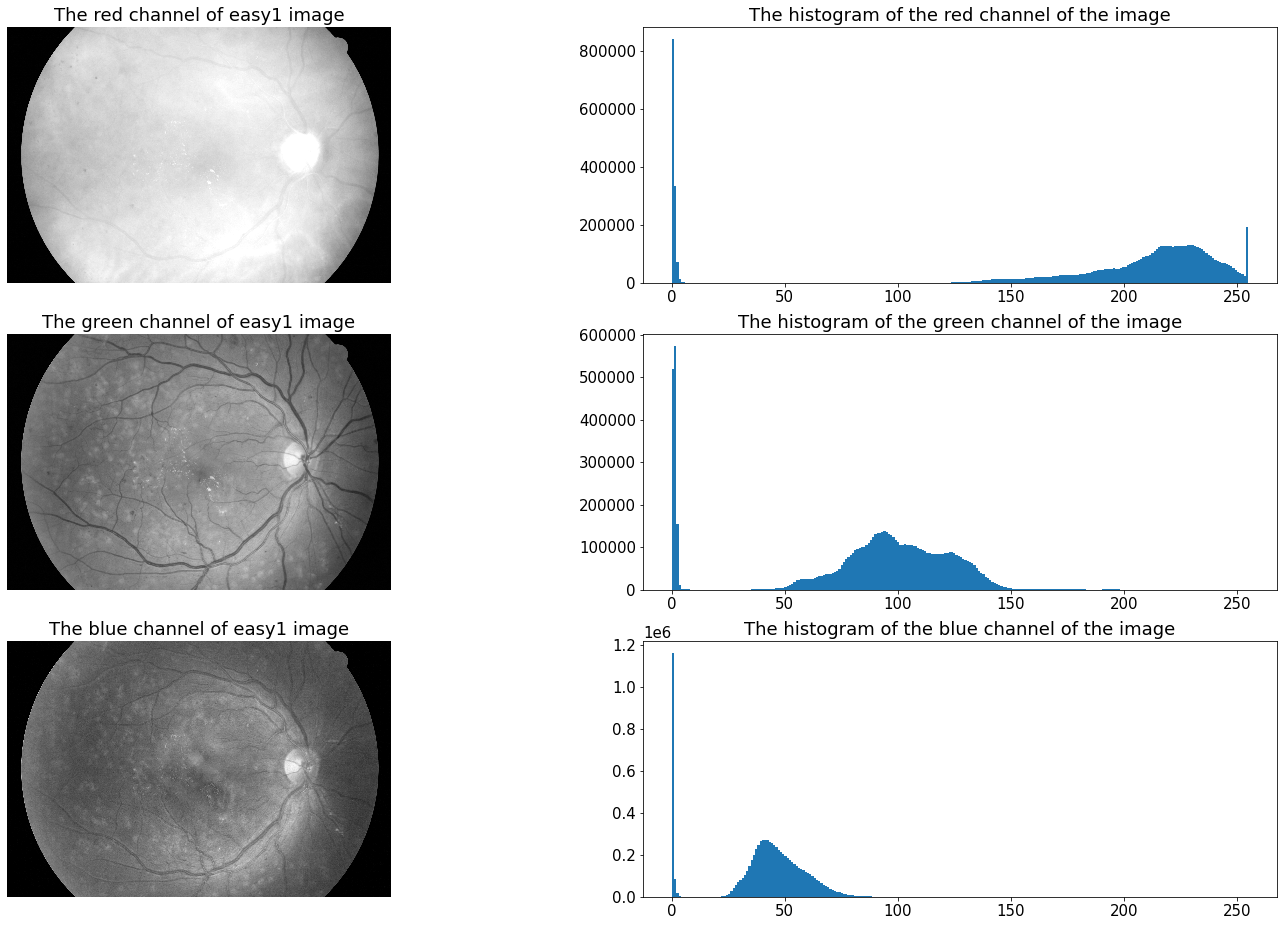

In [21]:
I_hard = np.asarray(imageio.imread('hard1.jpg'))

Ir_hard = I_hard[:,:,0]
Ig_hard = I_hard[:,:,1]
Ib_hard = I_hard[:,:,2]

plt.figure(figsize=(25,16))

plt.subplot(3,2,1)
plt.imshow(Ir_hard,cmap="gray")
plt.axis('off')
plt.title('The red channel of easy1 image')

plt.subplot(3,2,2)
plt.hist(Ir_hard.flatten(),bins=256,range=[0,255])
plt.title('The histogram of the red channel of the image')

plt.subplot(3,2,3)
plt.imshow(Ig_hard,cmap="gray")
plt.axis('off')
plt.title('The green channel of easy1 image')

plt.subplot(3,2,4)
plt.hist(Ig_hard.flatten(),bins=256,range=[0,255])
plt.title('The histogram of the green channel of the image')

plt.subplot(3,2,5)
plt.imshow(Ib_hard,cmap="gray")
plt.axis('off')
plt.title('The blue channel of easy1 image')

plt.subplot(3,2,6)
plt.hist(Ib_hard.flatten(),bins=256,range=[0,255])
plt.title('The histogram of the blue channel of the image')

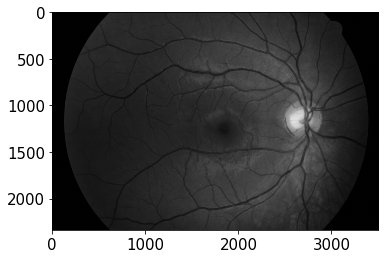

In [124]:
I_easy = np.asarray(imageio.imread('easy1.jpg'))
Ir_easy = I_easy[:,:,0]
Ig_easy = I_easy[:,:,1]
Ib_easy = I_easy[:,:,2]
average_kernel = np.ones((9,9))/81
I1_smoothed = ndimage.convolve(Ig_easy,average_kernel, mode="nearest")
#I1_smoothed  = np.where(I1_smoothed<50, I1_smoothed, 0)
plt.imshow(I1_smoothed,cmap="gray", vmin=0, vmax=255)

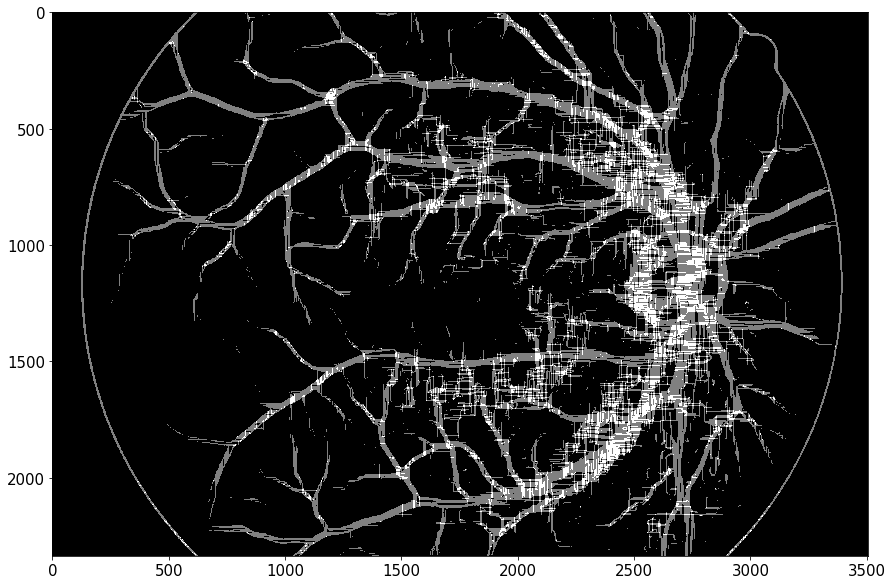

In [125]:
sobel_horiz = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
sobel_vert = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
I2=I1_smoothed
gx = ndimage.convolve(I2.astype(float), sobel_horiz, mode='nearest')
gy = ndimage.convolve(I2.astype(float), sobel_vert, mode='nearest')
M = abs(gx)+abs(gy)
alpha = np.rad2deg(np.arctan(gy/(gx+0.0000001)))

Tm = 0.12*np.max(M)
Ta = 45
gh = np.where((M > Tm)&((alpha < Ta)&(alpha > -Ta)), 1, 0)

Tm = 0.12*np.max(M)
Ta = 45
A = 90
gv = np.where((M > Tm)&((np.abs(alpha) < A+Ta)&(np.abs(alpha) > A-Ta)), 1 , 0)

L = 60 
gh_conn = gh
row_number, column_number = gh.shape
for i in range(row_number):
    counter = 0
    edge_begin = 0
    for j in range(column_number):
        if (gh[i,j] == 1) and (counter == 0):
            edge_begin = 1
        elif (gh[i,j] == 1) & (counter > L):
            counter = 0
        elif (gh[i,j] == 0) & (edge_begin == 1):
            counter += 1
        elif (gh[i,j] == 1) & (counter <= L):
            gh_conn[i,j-counter:j] = 1
            edge_begin = 0
            counter = 0
                      
L = 60 
gv_T = gv.T
gv_conn = gv.T
row_number, column_number = gv_T.shape
for i in range(row_number):
    counter = 0
    edge_begin = 0
    for j in range(column_number):
        if (gv_T[i,j] == 1) and (counter == 0):
            edge_begin = 1
        elif (gv_T[i,j] == 1) & (counter > L):
            counter = 0
        elif (gv_T[i,j] == 0) & (edge_begin == 1):
            counter += 1
        elif (gv_T[i,j] == 1) & (counter <= L):
            gv_conn[i,j-counter:j] = 1
            edge_begin = 0
            counter = 0

gv_conn = gv_conn.T   

g_conn = gh_conn + gv_conn   

plt.figure(figsize=(15,10))
plt.imshow(g_conn,cmap="gray")

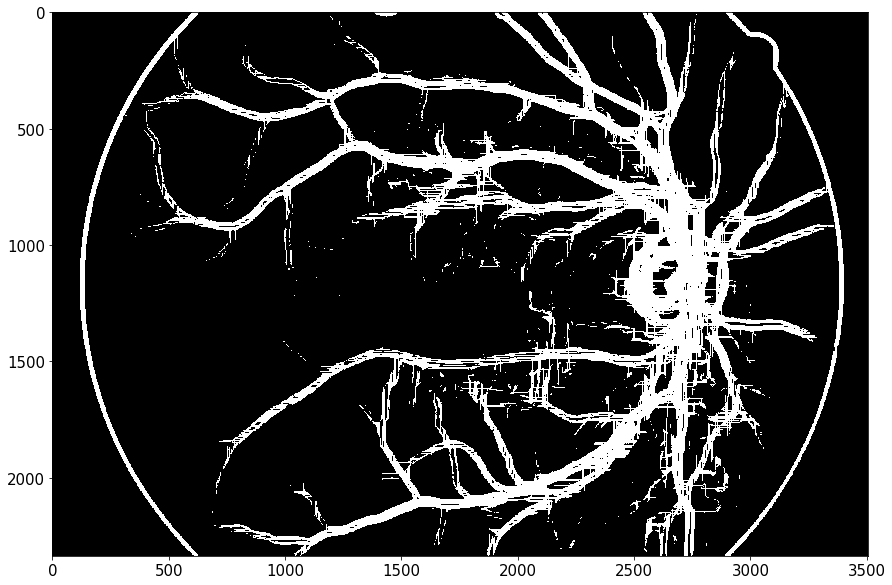

In [123]:
plt.figure(figsize=(15,10))
plt.imshow(g_conn>0.5,cmap="gray")